In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
from scipy.stats import norm

import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings(action='ignore')

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### 데이터셋 조인 및 전처리

In [2]:
df_1=pd.read_csv("train_bikes.csv",parse_dates=["datetime"])
df_2=pd.read_csv("hour.csv",parse_dates=["dteday"])

df_1["casual"]=df_2["casual"]
df_1["registered"]=df_2["registered"]
df_1["count"]=df_2["cnt"]
df=df_1
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,11,108,119
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,8,81,89
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,7,83,90
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,13,48,61
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,12,37,49


In [3]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df.set_index('datetime', inplace=True)

df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### 데이터셋 확인

In [4]:
round(df.describe(),2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00
mean,2.50,0.03,0.68,1.43,20.38,23.79,62.72,12.74,35.68,153.79,189.46,2011.5,6.54,15.68,11.55
std,1.11,0.17,0.47,0.64,7.89,8.59,19.29,8.20,49.31,151.36,181.39,0.5,3.44,8.79,6.91
min,1.00,0.00,0.00,1.00,0.82,0.00,0.00,0.00,0.00,0.00,1.00,2011.0,1.00,1.00,0.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,48.00,7.00,4.00,34.00,40.00,2011.0,4.00,8.00,6.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,63.00,13.00,17.00,115.00,142.00,2012.0,7.00,16.00,12.00
75%,3.00,0.00,1.00,2.00,27.06,31.06,78.00,17.00,48.00,220.00,281.00,2012.0,10.00,23.00,18.00
max,4.00,1.00,1.00,4.00,41.00,50.00,100.00,57.00,367.00,886.00,977.00,2012.0,12.00,31.00,23.00


In [5]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   casual      17379 non-null  int64  
 9   registered  17379 non-null  int64  
 10  count       17379 non-null  int64  
 11  year        17379 non-null  int64  
 12  month       17379 non-null  int64  
 13  day         17379 non-null  int64  
 14  hour        17379 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 2.1 MB


### EDA

### 휴일에 따른 자전거 대여 수

In [7]:
df_1=round(df.groupby("workingday").mean()[["casual","registered","count"]],2)
df_1

,casual,registered,count
workingday,,,
0,57.44,123.96,181.41
1,25.56,167.65,193.21


<AxesSubplot:xlabel='workingday'>

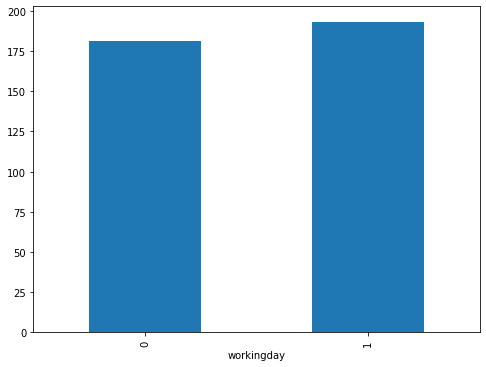

In [8]:
df_1["count"].plot.bar()

### 날씨 별 이용 수

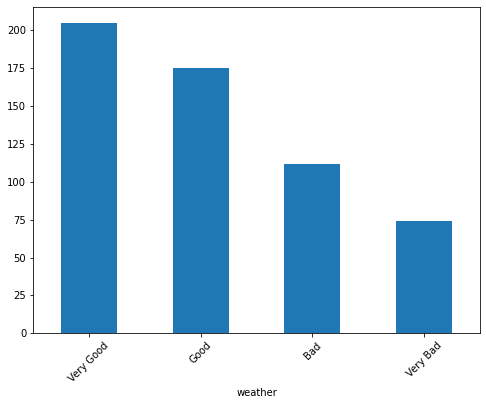

In [9]:
df.groupby("weather").mean()["count"].plot.bar()
xlabel=['Very Good','Good','Bad','Very Bad']
x=[0,1,2,3]
plt.xticks(x,xlabel,rotation=45)
plt.show()

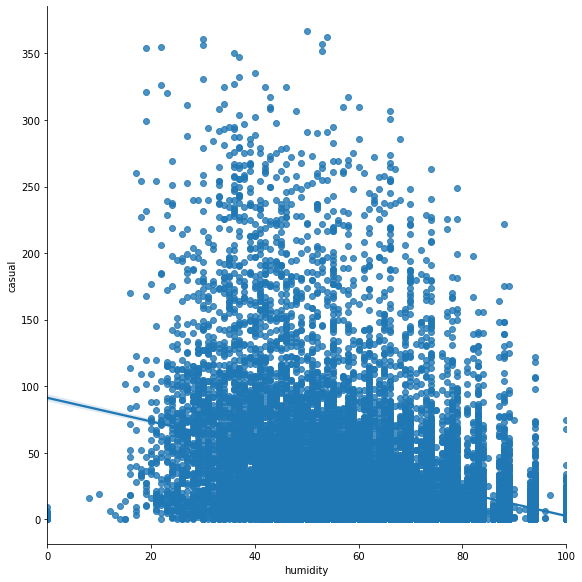

In [10]:
sns.lmplot("humidity","casual",height=8,data=df,)

### 풍속별 이용 수

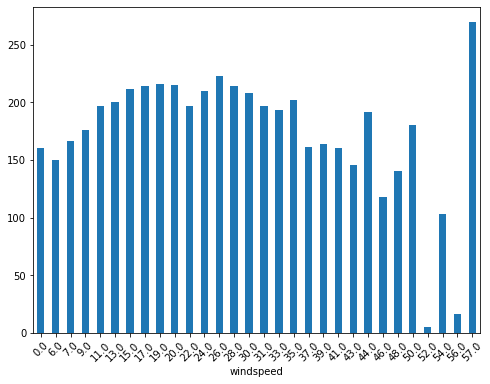

In [11]:
df_rnd=round(df)
df_rnd.groupby("windspeed").mean()["count"].plot.bar()
plt.xticks(rotation=45)
plt.show()

### 온도별 이용 수

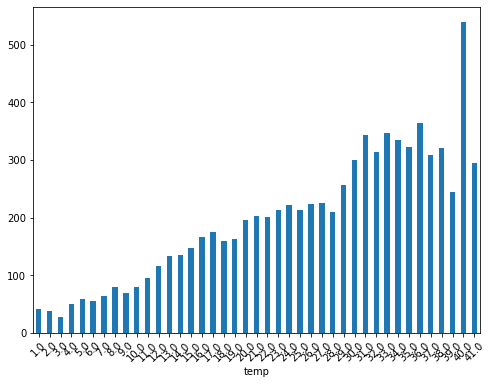

In [12]:
df_rnd=round(df)
df_rnd.groupby("temp").mean()["count"].plot.bar()
plt.xticks(rotation=45)
plt.show()

### 시간별 이용 수

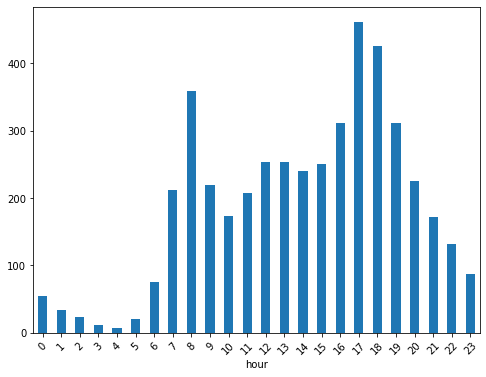

In [13]:
df.groupby("hour").mean()["count"].plot.bar()
plt.xticks(rotation=45)
plt.show()

### 계절과 자전거 대여 수의 관계

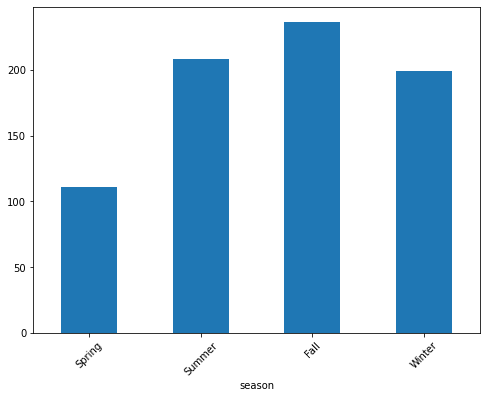

In [14]:
df.groupby("season").mean()["count"].plot.bar()
xlabel=['Spring','Summer','Fall','Winter']
x=[0,1,2,3]
plt.xticks(x,xlabel,rotation=45)
plt.show()

### 상관계수 분석


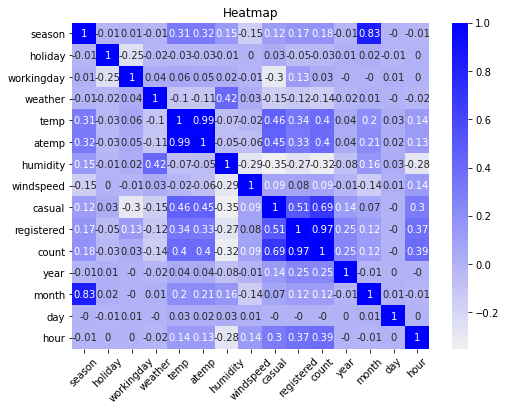

In [15]:
sns.heatmap(round(df.corr(),2), cmap=sns.light_palette("blue", as_cmap=True), annot=True)
plt.title("Heatmap")  
plt.xticks(rotation=45)
plt.show()

In [16]:
df_corr=df.corr().unstack()
df_corr=df_corr[df_corr!=1].sort_values(ascending=False).drop_duplicates().to_frame()
df_corr[abs(df_corr)>=0.3].dropna()

,,0
atemp,temp,0.987672
count,registered,0.972151
month,season,0.830386
casual,count,0.694564
registered,casual,0.506618
casual,temp,0.459616
atemp,casual,0.454080
weather,humidity,0.418130
temp,count,0.404772
atemp,count,0.400929


### 모델링_ 선형회귀

<AxesSubplot:xlabel='datetime'>

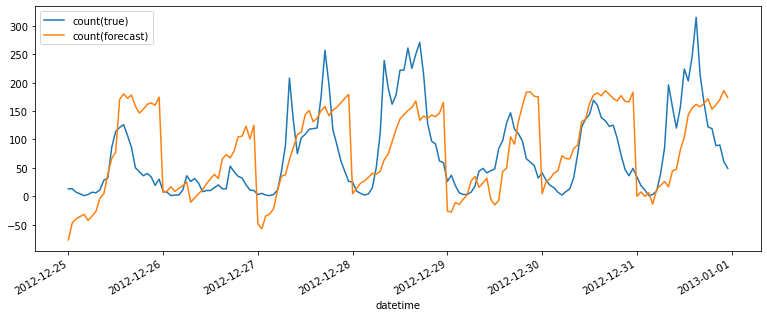

In [17]:
useful_columns = ['season','workingday','weather','temp','humidity','windspeed',"hour"]

n=168-1 #마지막 1주치만 예측 (2012년 12월 24일~ 31일)
train = df.iloc[:-n,:]
test = df.iloc[-n:,:]

X_train=train[useful_columns]
y_train=train[['count']]

X_test=test[useful_columns]
y_test=test[['count']]

linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)

forecast = pd.DataFrame(X_test)
forecast["count(true)"]=y_test
forecast["count(forecast)"]=y_pred

LR_forecast=forecast[["count(true)","count(forecast)"]]

LR_forecast.plot(figsize = (13,5))

### 모델링_RandomForestRegressor

<AxesSubplot:xlabel='datetime'>

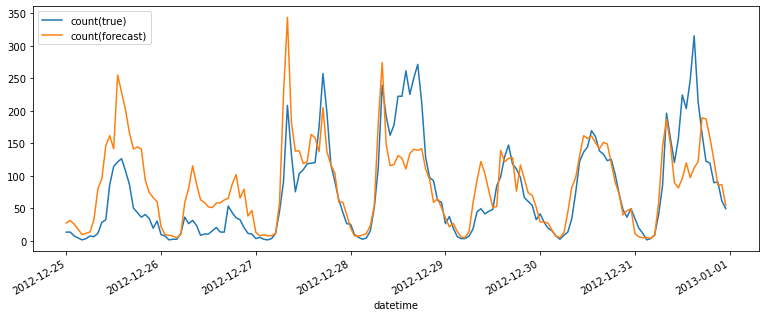

In [18]:
useful_columns = ['season','workingday','weather','temp','humidity','windspeed',"hour"]

n=168-1 #마지막 1주치만 예측 (2012년 12월 24일~ 31일)
train = df.iloc[:-n,:]
test = df.iloc[-n:,:]

X_train=train[useful_columns]
y_train=train[['count']]

X_test=test[useful_columns]
y_test=test[['count']]

rf=RandomForestRegressor(random_state=10)
params={"n_estimators":range(100,1000,100),"max_features":["auto", "sqrt", "log2"]}
rf_grid=GridSearchCV(rf,params)
rf_grid.fit(X_train, y_train)

y_pred = rf_grid.predict(X_test)

forecast=pd.DataFrame(X_test)
 
forecast["count(true)"]=y_test
forecast["count(forecast)"]=y_pred

gf_forecast=forecast[["count(true)","count(forecast)"]]

gf_forecast.plot(figsize = (13,5))

In [19]:
MAE =  mean_absolute_error(y_test, y_pred)
print("MAE:",round(MAE,2))

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("RMSE:",round(RMSE,2))

R2 = r2_score(y_test, y_pred)
print("R2:",round(R2,2))

MAE: 35.61
RMSE: 51.93
R2: 0.49
